In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download saqibgulzarbhat/uci-phishing-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/saqibgulzarbhat/uci-phishing-detection-dataset
License(s): Apache 2.0
 57% 9.00M/15.9M [00:00<00:00, 29.2MB/s]
100% 15.9M/15.9M [00:00<00:00, 45.1MB/s]


In [ ]:
! unzip uci-phishing-detection-dataset

Archive:  uci-phishing-detection-dataset.zip
  inflating: PhiUSIIL_Phishing_URL_Dataset.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import io

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
set=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
data=set.copy()

In [ ]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

<Axes: >

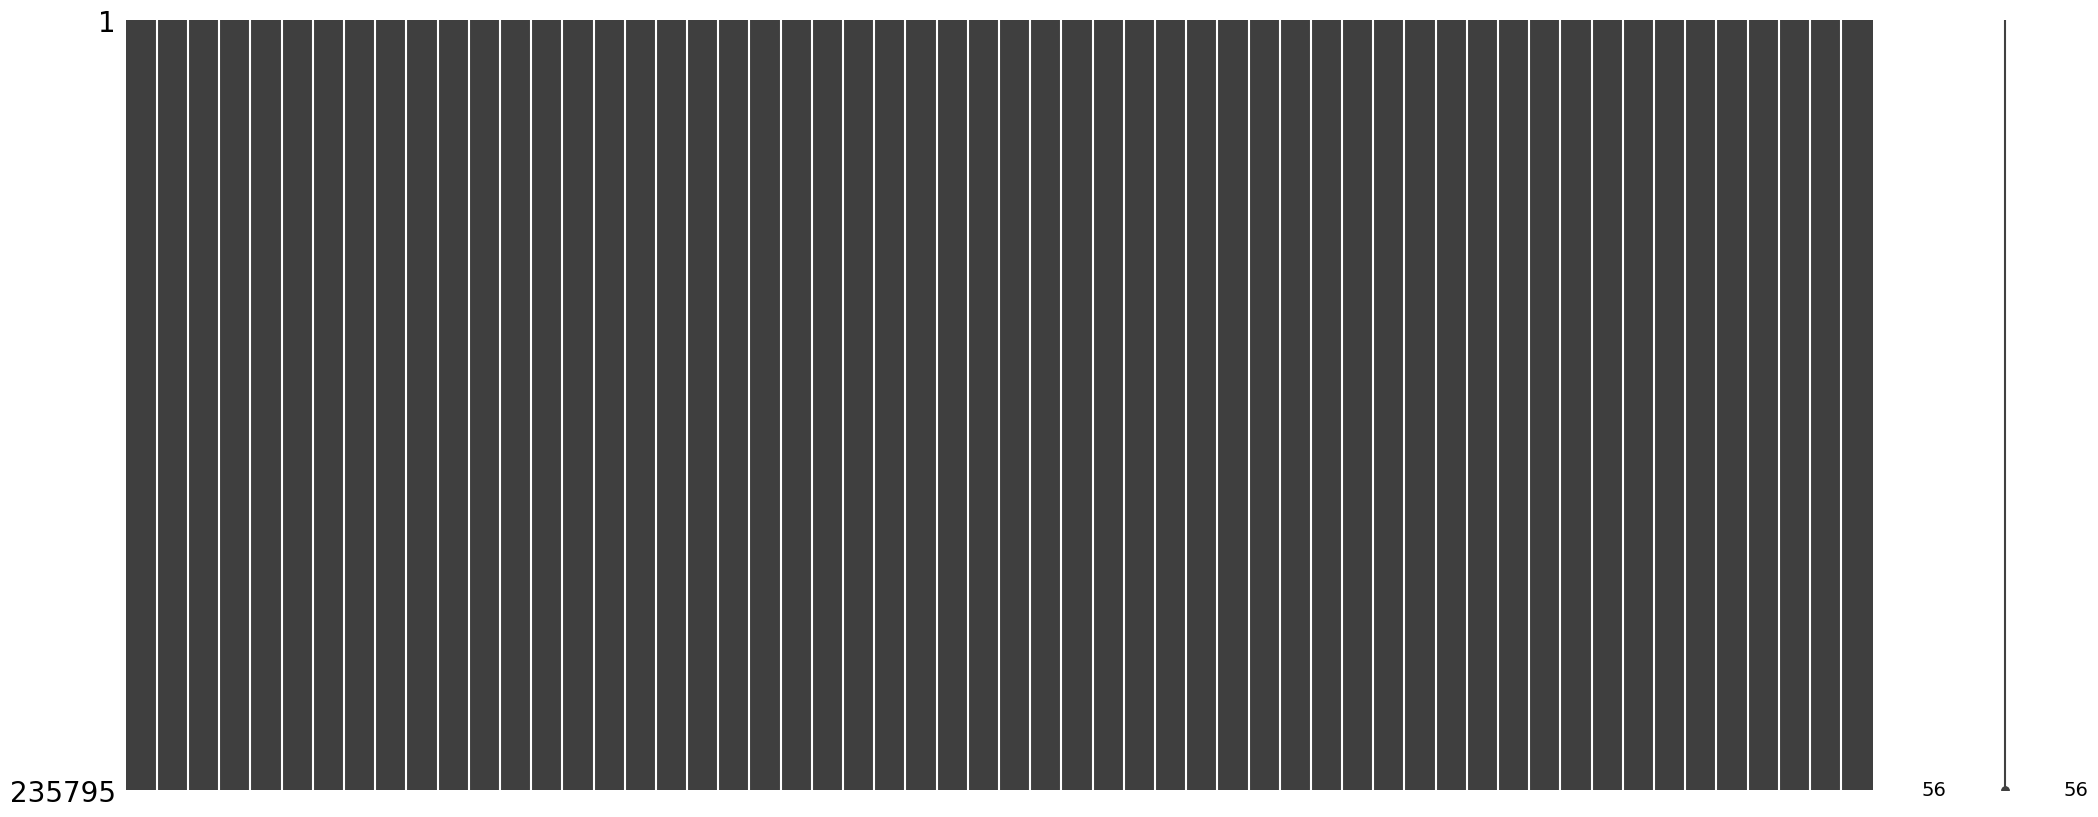

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
object_features = data.select_dtypes(include='object')
object_features_df = pd.DataFrame(object_features)
print(object_features_df.shape)
object_features_df.head()

(235795, 5)


,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina


In [ ]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])
numeric_features_df = pd.DataFrame(numeric_features)
print(numeric_features_df.shape)
numeric_features_df.head()

(235795, 51)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


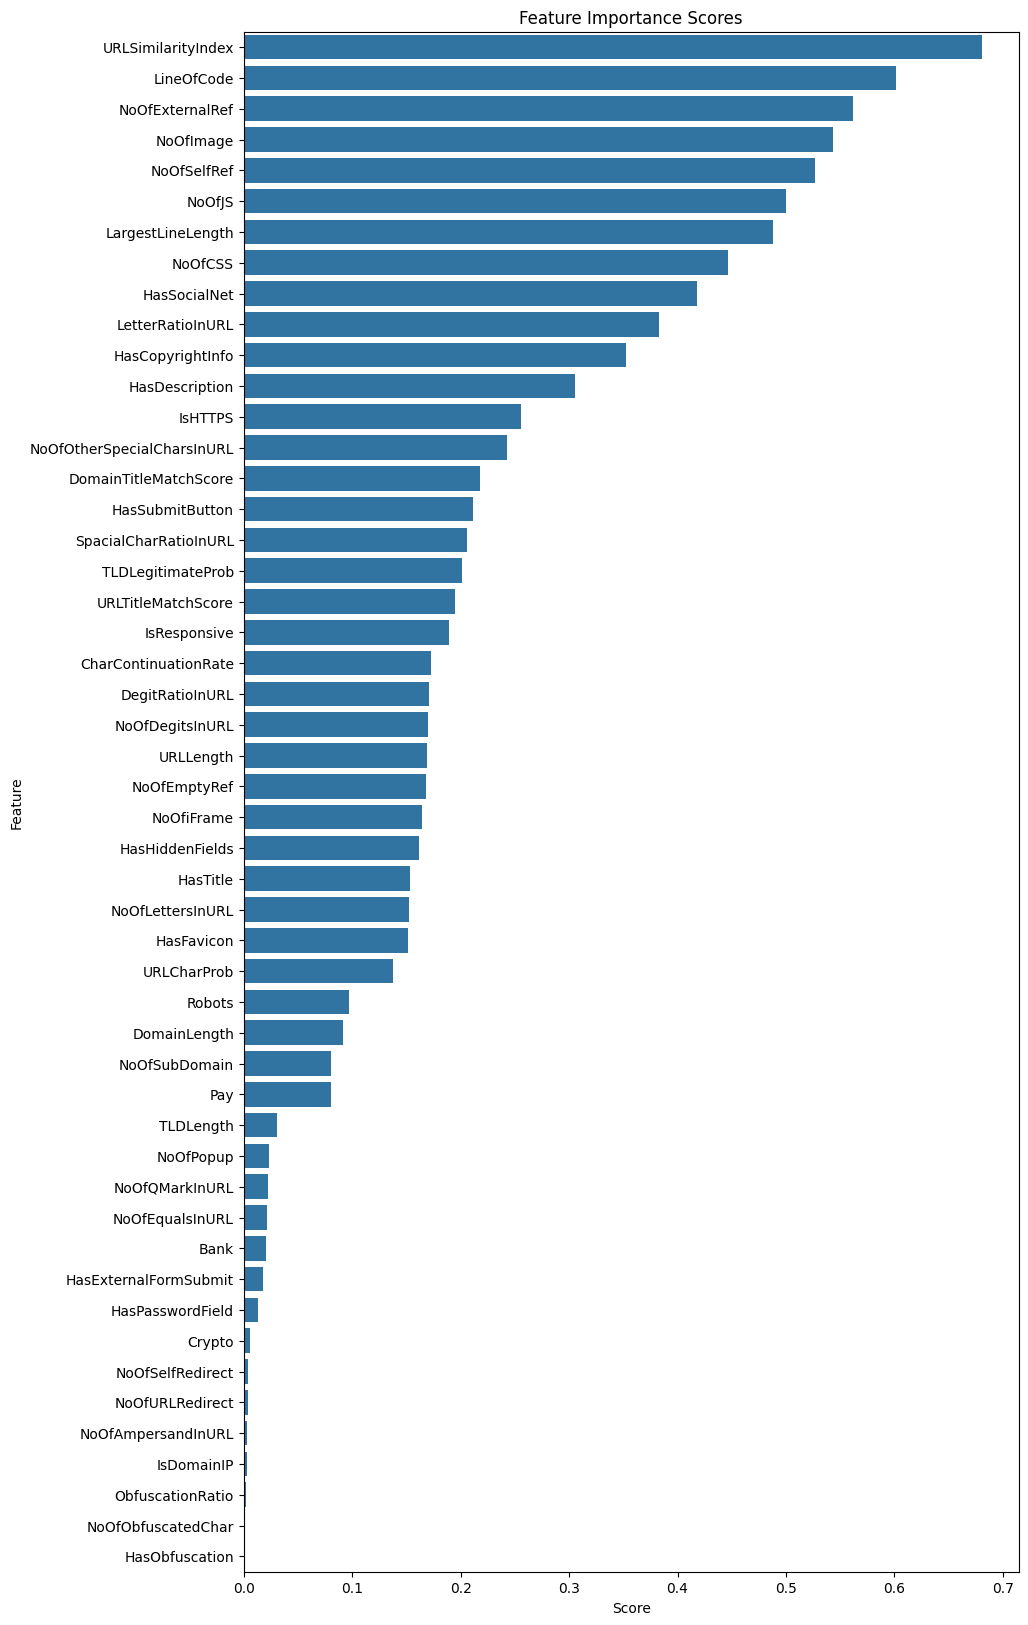

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = numeric_features.drop('label', axis=1)
y = numeric_features['label']
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
plt.figure(figsize=(10, 20))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores')
plt.show()

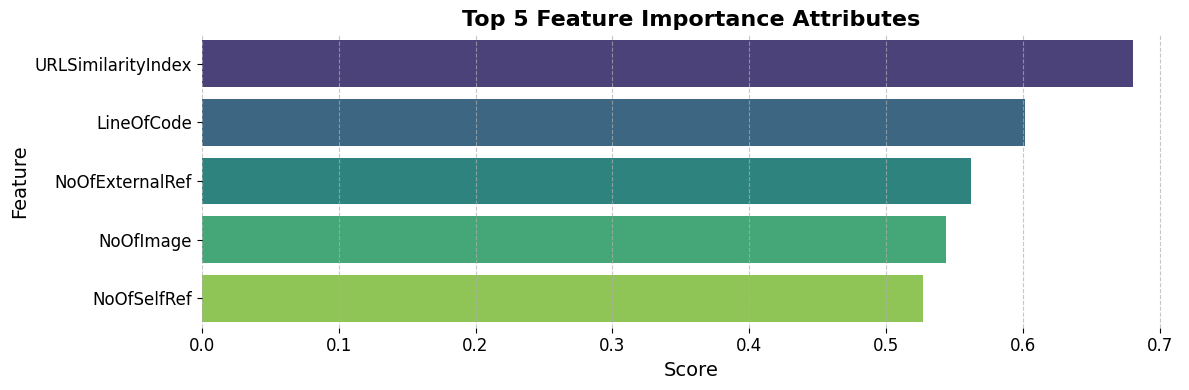

In [ ]:
top_5_features = feature_scores.head(5)
plt.figure(figsize=(12, 4))
sns.barplot(x='Score', y='Feature', data=top_5_features, palette="viridis")
plt.title('Top 5 Feature Importance Attributes', fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


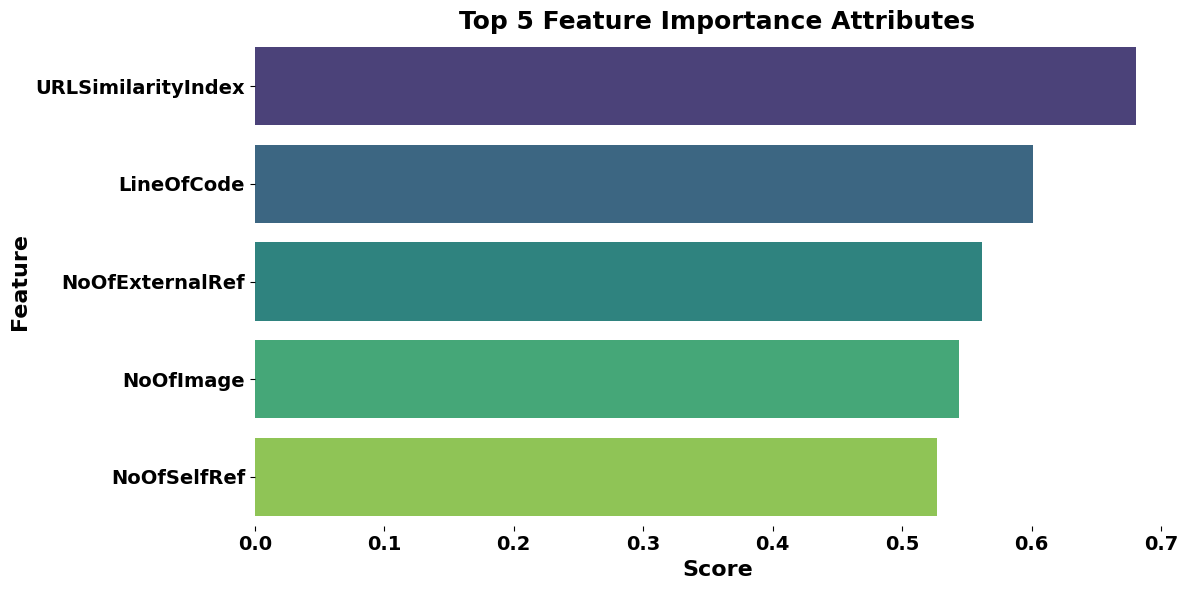

In [ ]:

plt.figure(figsize=(12, 6))  # Increased height for better visualization
sns.barplot(x='Score', y='Feature', data=top_5_features, palette="viridis")
plt.title('Top 5 Feature Importance Attributes', fontsize=18, fontweight='bold')
plt.xlabel('Score', fontsize=16, fontweight='bold')
plt.ylabel('Feature', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
sns.despine(left=True, bottom=True)
plt.gca().grid(False)  # Removed grid lines
plt.tight_layout()
plt.show()


In [ ]:
data1 = data.loc[:,["NoOfSelfRef","NoOfImage","NoOfExternalRef",
                    "LineOfCode","URLSimilarityIndex","label"]]
data1.head()

,NoOfSelfRef,NoOfImage,NoOfExternalRef,LineOfCode,URLSimilarityIndex,label
0,119,34,124,558,100.0,1
1,39,50,217,618,100.0,1
2,42,10,5,467,100.0,1
3,22,3,31,6356,100.0,1
4,72,244,85,6089,100.0,1


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
NoOfSelfRef,235795.0,65.071113,176.687539,0.000000,0.000000,12.0,88.0,27397.0
NoOfImage,235795.0,26.075689,79.411815,0.000000,0.000000,8.0,29.0,8956.0
NoOfExternalRef,235795.0,49.262516,161.027430,0.000000,1.000000,10.0,57.0,27516.0
LineOfCode,235795.0,1141.900443,3419.950513,2.000000,18.000000,429.0,1277.0,442666.0
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.0,100.0,100.0
label,235795.0,0.571895,0.494805,0.000000,0.000000,1.0,1.0,1.0


label
1    134850
0    100945
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Target Column')

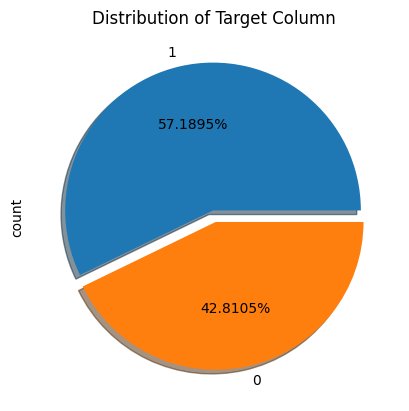

In [ ]:
print(data1.label.value_counts())
data1['label'].value_counts().plot.pie(explode=[0.04,0.04],autopct='%2.4f%%',shadow=True)
plt.title('Distribution of Target Column')

In [ ]:
zero  = data1[data1['label']==0]
one = data1[data1['label']==1]
from sklearn.utils import resample
one_dataset = resample(one, replace = True, n_samples = 5000)
zero_dataset = resample(zero, replace = True, n_samples = 5000)
dataset = pd.concat([one_dataset, zero_dataset])

from sklearn.utils import shuffle
data1 = shuffle(dataset)

In [ ]:
data1.reset_index(inplace=True)
data1.drop('index', inplace=True, axis=1)

In [ ]:
print(data1.label.value_counts())

label
0    5000
1    5000
Name: count, dtype: int64


In [ ]:
data1.shape

(100000, 6)

<Axes: >

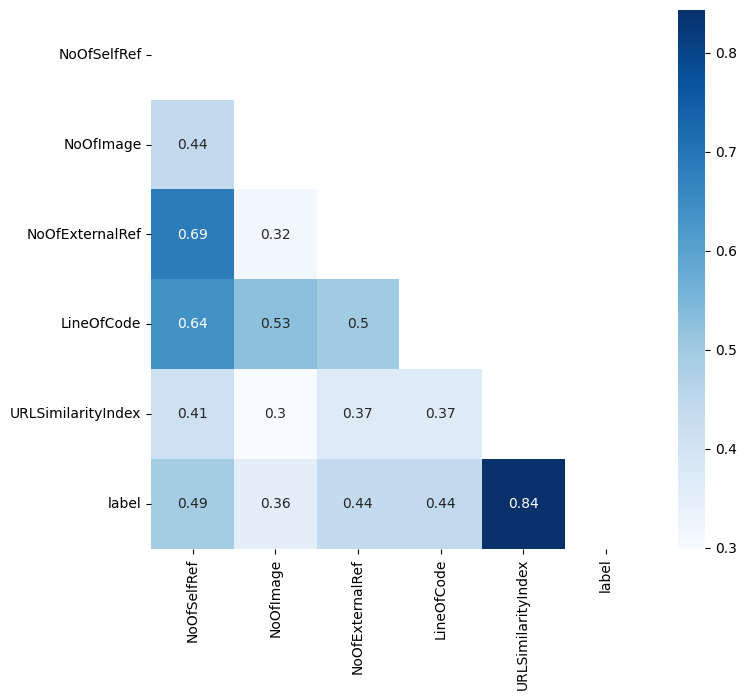

In [ ]:
plt.figure(figsize=(8,7))
matrix=np.triu(data1.corr(),k=0)
sns.heatmap(data1.corr(),annot=True,cmap='Blues',mask=matrix)

In [ ]:
corr_matrix = data1.corr()
threshold = 0.7
correlated_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold and i != j:
            correlated_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Create a Pandas DataFrame
df_correlated_pairs = pd.DataFrame.from_dict(correlated_pairs, orient='index', columns=['Correlation Coefficient'])

# Set the index as the first column
df_correlated_pairs.index.name = 'Attribute Pairs'

# Display the table
print("Highly positively correlated pairs without self correlation:")
print(df_correlated_pairs.to_string())

Highly positively correlated pairs without self correlation:
                             Correlation Coefficient
Attribute Pairs                                     
(URLSimilarityIndex, label)                 0.843446


In [ ]:
x = data1.drop(['label'], axis=1)
y = data1['label']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(9000, 5) (1000, 5) (9000,) (1000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, classification_report, recall_score
from sklearn import metrics

# **Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [10, 20,30, 40,50,60,70],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'max_depth': [10,11,12,13,14,15]
}

In [ ]:
grid = param_dist
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
grid_search1 = RandomizedSearchCV(estimator=rf_classifier, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result1 = grid_search1.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999778 using {'n_estimators': 60, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
0.999778 (0.000667) with: {'n_estimators': 60, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
0.999741 (0.000713) with: {'n_estimators': 20, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'entropy'}
0.999741 (0.000821) with: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
0.999778 (0.000667) with: {'n_estimators': 70, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
0.999741 (0.000821) with: {'n_estimators': 40, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'gini'}
0.999741 (0.000713) with: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 11, 'criterion': 'gini'}
0.999778 (0.000667) with: {'n_estimators': 70, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy'}
0.999741 (0.000713) with: {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'gini'}
0.999704 

In [ ]:
best_params= grid_result1.best_params_
print(best_params)
best_classifier =RandomForestClassifier(n_estimators= 30, max_features= 'auto', max_depth= 10, criterion='gini')
best_classifier.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


{'n_estimators': 60, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
[[478   0]
 [  0 522]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       522

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



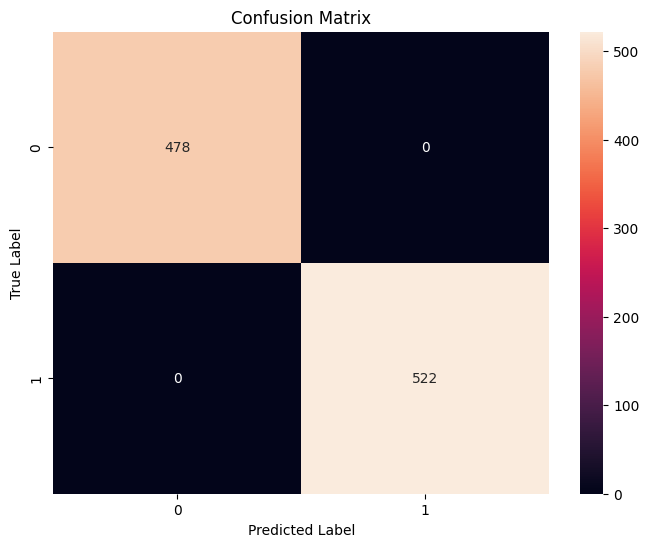

In [ ]:
# prompt: generate heatmap confusion matrix for above model

import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'y_test' and 'y_pred' are already defined from the previous code

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
sns.color_palette("tab10")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1.0


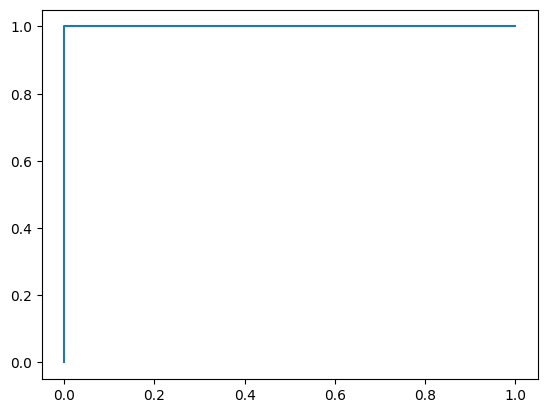

In [ ]:
y_pred_proba = best_classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="Fandom forest AUC="+str(auc))

**Feature Importance**

In [ ]:
from sklearn.feature_selection import SelectFromModel
feature_importances = best_classifier.feature_importances_
sfm = SelectFromModel(best_classifier)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)
selected_rf_classifier = RandomForestClassifier(random_state=42)
selected_rf_classifier.fit(X_train_selected, y_train)
y_pred = selected_rf_classifier.predict(X_test_selected)
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

              Feature  Importance
4  URLSimilarityIndex    0.539375
2     NoOfExternalRef    0.174445
3          LineOfCode    0.152209
0         NoOfSelfRef    0.123757
1           NoOfImage    0.010214


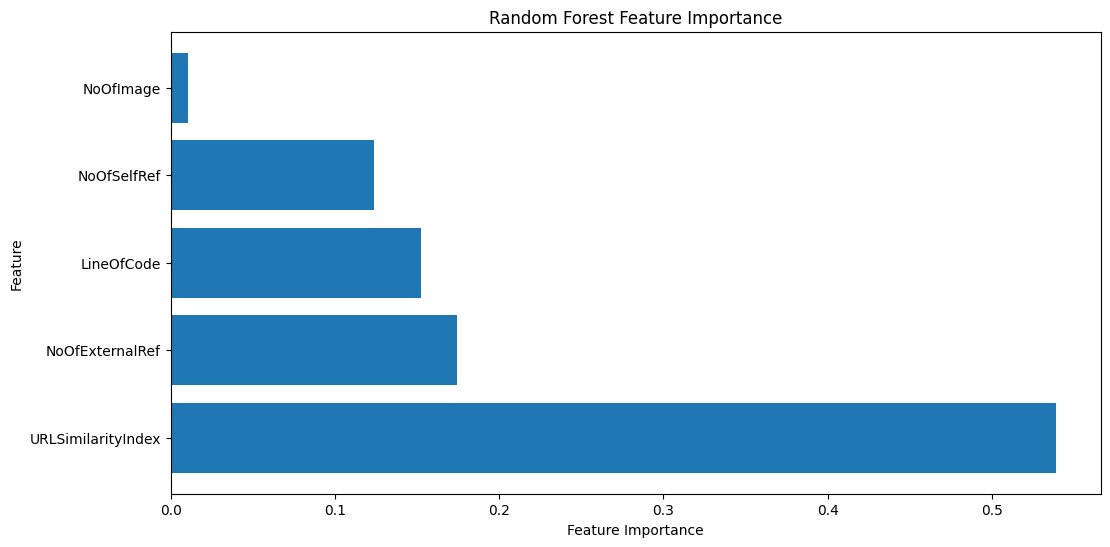

In [ ]:
# Plot the feature importances
print(feature_importance_df)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search2 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999556 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999259 (0.000922) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999556 (0.000679) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.995704 (0.004184) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.999185 (0.000949) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999519 (0.000742) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.994741 (0.005010) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.999185 (0.000904) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999556 (0.000737) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.993667 (0.005244) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.999222 (0.000914) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999444 (0.000799) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988519 (0.003350) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.999074 (0.000955) with: {

In [ ]:
log_model = LogisticRegression(C=0.001, penalty='l2',solver='liblinear')
log_model.fit(x_train,y_train)
log_pred= log_model.predict(x_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[454  24]
 [ 32 490]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       478
           1       0.95      0.94      0.95       522

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



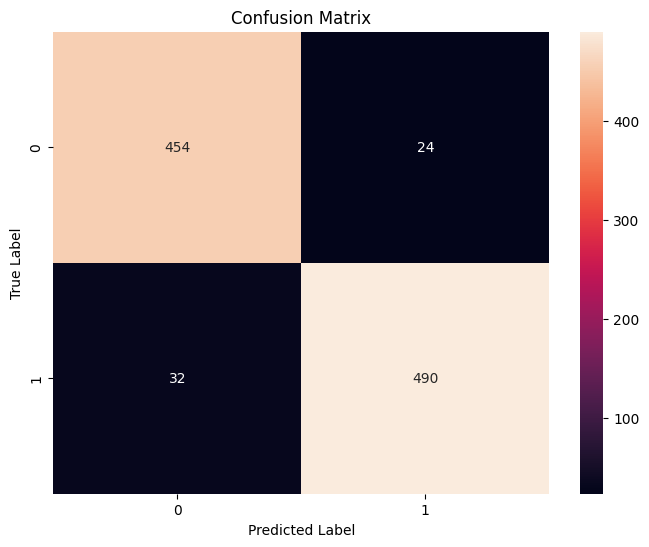

In [ ]:
cm = confusion_matrix(y_test, log_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
sns.color_palette("tab10")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1.0


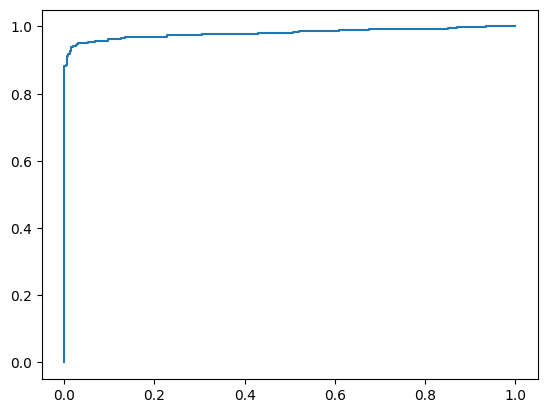

In [ ]:
y_pred_proba3 = log_model.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc3)
plt.plot(fpr3,tpr3,label="Logistic Regression AUC="+str(auc))

# **SVC**

In [ ]:
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search3 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result3 = grid_search3.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998074 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.882815 (0.014098) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.998074 (0.001215) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.995667 (0.002337) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.856000 (0.014150) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.995741 (0.002367) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.988370 (0.004348) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.801222 (0.014800) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.968889 (0.006160) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.951593 (0.011838) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.730000 (0.015318) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.946333 (0.007498) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.936296 (0.008146) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.645370 (0.013312) with: {'C': 0.01, 'gamma': 'scale', 

In [ ]:
model1= SVC(C=0.01,gamma='scale', kernel='rbf', probability=True)
model1.fit(x_train, y_train)
pred1=model1.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[476   2]
 [ 89 433]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       478
           1       1.00      0.83      0.90       522

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



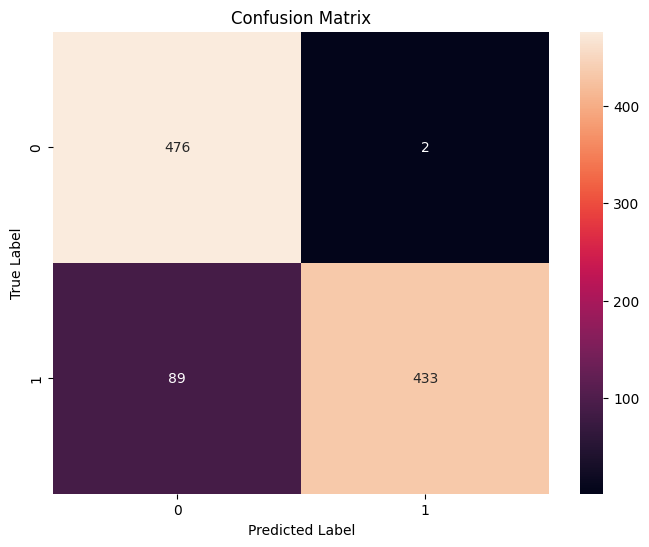

In [ ]:
cm = confusion_matrix(y_test, pred1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
sns.color_palette("tab10")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

0.992875743526767


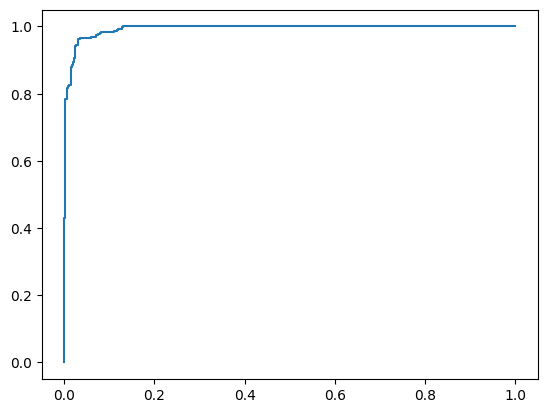

In [ ]:
y_pred_proba2 = model1.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
print(auc2)
plt.plot(fpr2,tpr2,label="SVM AUC="+str(auc2))

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
gb_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
y_pred_best_random = best_model_random.predict(x_test)
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print("Best Parameters (Randomized Search):", best_params_random)
print(f"Best Model Accuracy (Randomized Search): {accuracy_best_random}")

Best Parameters (Randomized Search): {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1577777777777778}
Best Model Accuracy (Randomized Search): 0.999


In [ ]:
print(classification_report(y_test,y_pred_best_random))
print(confusion_matrix(y_test,y_pred_best_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       497

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[503   0]
 [  0 497]]


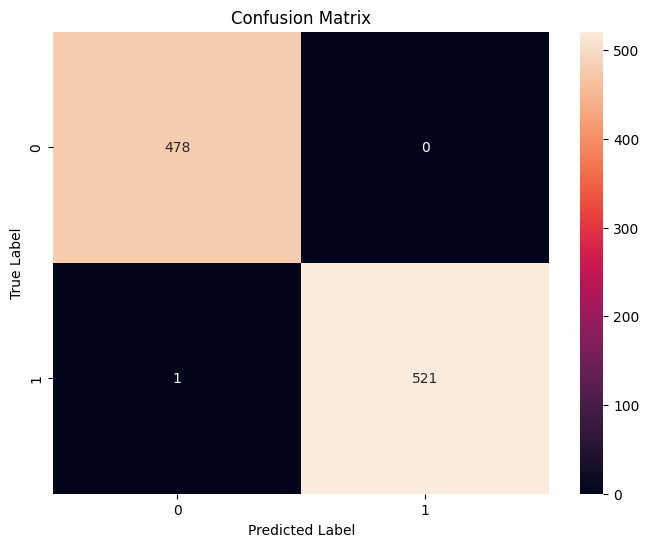

In [ ]:
cm = confusion_matrix(y_test,y_pred_best_random)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
sns.color_palette("tab10")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1.0


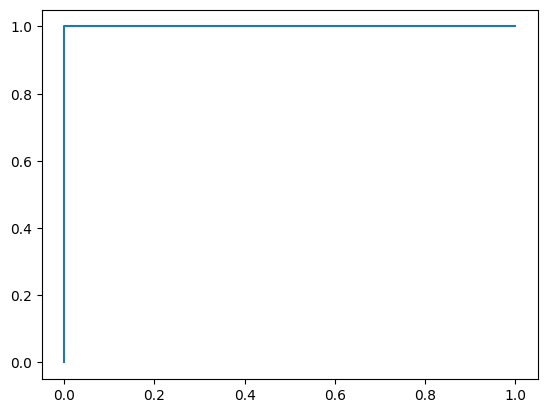

In [ ]:
y_pred_proba1 = best_model_random.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
print(auc)
plt.plot(fpr,tpr,label="Gradient Boosting AUC="+str(auc1))

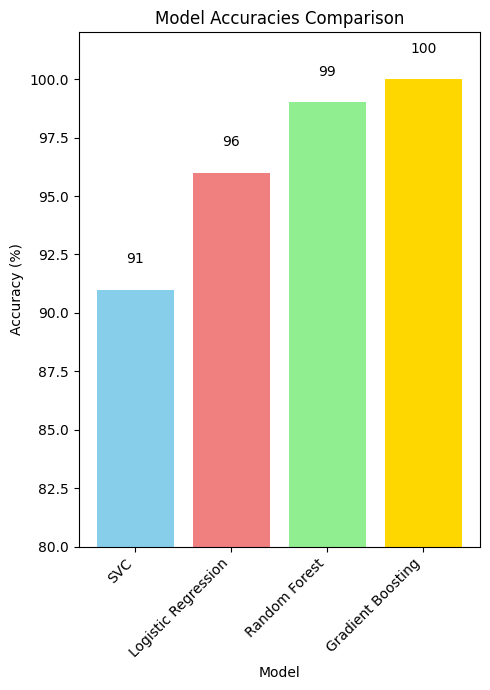

In [ ]:
import matplotlib.pyplot as plt

model=["SVC","Logistic Regression","Random Forest","Gradient Boosting"]
accuracies=[91, 96, 99, 100]
plt.figure(figsize=(5, 7))
plt.bar(model, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparison')
plt.ylim(80, 102)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


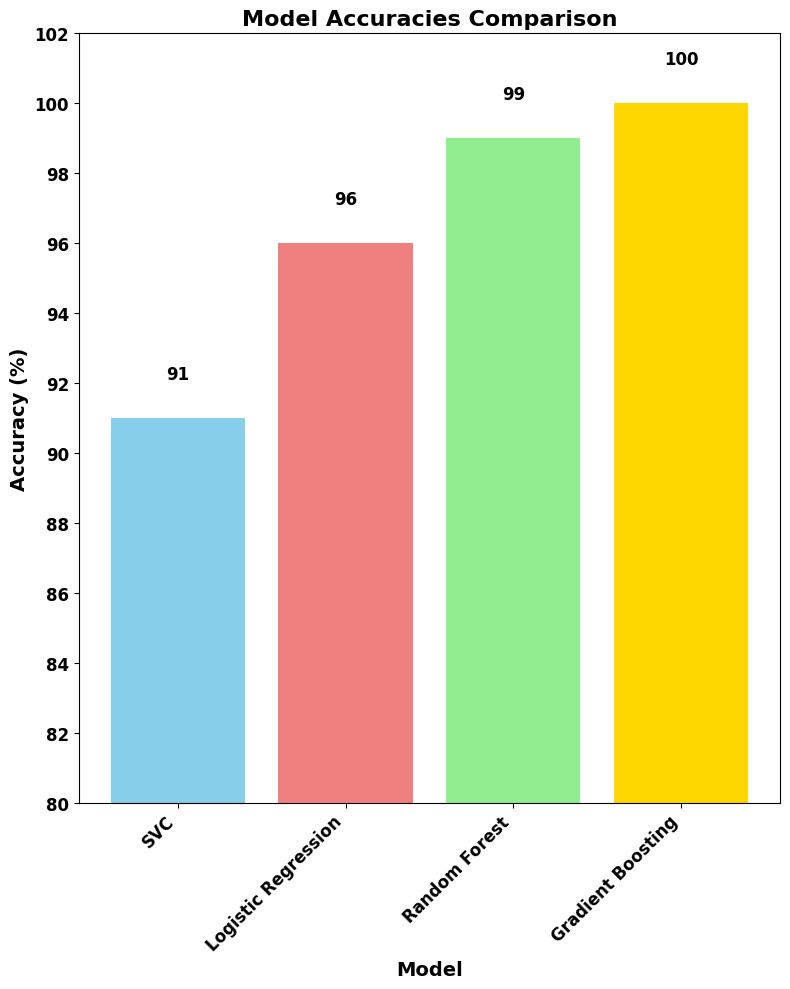

In [ ]:

model=["SVC","Logistic Regression","Random Forest","Gradient Boosting"]
accuracies=[91, 96, 99, 100]

plt.figure(figsize=(8, 10))  # Increased figure size
plt.bar(model, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Enhanced labels and title
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Model Accuracies Comparison', fontsize=16, fontweight='bold')

# Improved y-axis limits and ticks
plt.ylim(80, 102)
plt.yticks(np.arange(80, 103, 2), fontsize=12, fontweight='bold')  # Increased tick frequency

# Rotated x-axis labels and bold
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')

# Value annotations above bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


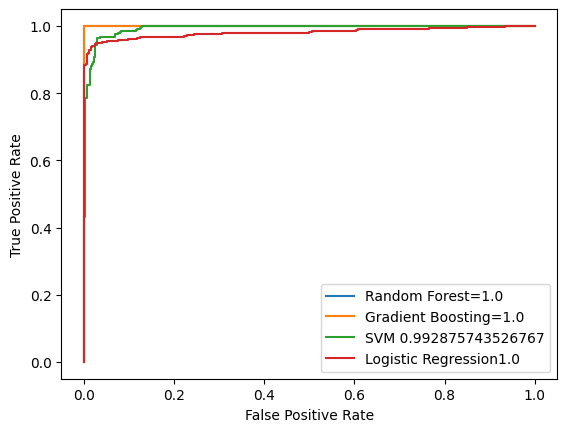

In [ ]:
#create ROC curve
plt.plot(fpr,tpr,label="Random Forest="+str(auc))
plt.plot(fpr1,tpr1,label="Gradient Boosting="+str(auc1))
plt.plot(fpr2,tpr2,label="SVM "+str(auc2))
plt.plot(fpr3,tpr3,label="Logistic Regression"+str(auc3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
model=["SVC","Logistic Regression","Random Forest","Gradient Boosting"]
Roc=[0.9880662240524414, 0.9989955138286931, 0.9989955138286931, 0.99902235273872554]